# 🛫 Flight Price Prediction

Importing relevant libraries

In [1]:
# We are using numpy , pandas , matplotlib , seaborn for data analysis and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for the plots to appear inside the notebook
%matplotlib inline
sns.set()

# Regression Model
from sklearn.ensemble import ExtraTreesRegressor , RandomForestRegressor
# Hyperparameter tuning
from sklearn.model_selection import train_test_split , RandomizedSearchCV ,GridSearchCV
# Evaluation matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# Saving the model
import pickle

Import Dataset

In [2]:
train = pd.read_excel(r'Data_Train.xlsx')
test = pd.read_excel(r'Test_set.xlsx')
sample = pd.read_excel(r'Sample_submission.xlsx')

print('Train shape:',train.shape)
print('Test shape:',test.shape)
print('Sample shape:',sample.shape)

Train shape: (10683, 11)
Test shape: (2671, 10)
Sample shape: (2671, 1)


In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
sample.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


In [7]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   D

In [8]:
#train.describe(include='all')

In [9]:
print(train.isnull().sum())
print('-'*80)
print(test.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
--------------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [10]:
# Drop the null values
train.dropna(inplace=True)
test.dropna(inplace=True)

In [11]:
#train.isnull().sum()

In [12]:
# Checking the 'Durtion' column
train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
35h 35m      1
33h 20m      1
28h 30m      1
42h 45m      1
36h 25m      1
Name: Duration, Length: 368, dtype: int64

Exploratory Data Analysis

In [13]:
# For Train data
# Handling 'Data-of-journey' column 
# Converting into Datetime formate and seperating day and month 
train['Journey Day'] = pd.to_datetime(train['Date_of_Journey'],format='%d/%m/%Y').dt.day
train['Journey Month'] = pd.to_datetime(train['Date_of_Journey'],format='%d/%m/%Y').dt.month

# Drop the actual Date-of-jourmey column
train.drop('Date_of_Journey',axis=1,inplace=True)

In [14]:
# Handling 'Departure Time' column
# Converting into Datetime formate and seperating hour and minute 
train['Dep_hour'] = pd.to_datetime(train['Dep_Time']).dt.hour
train['Dep_min'] = pd.to_datetime(train['Dep_Time']).dt.minute

# Drop the actual Dep_Time column
train.drop('Dep_Time',axis=1,inplace=True)

In [15]:
# Handling 'Arrival Time' column
# Converting into Datetime formate and seperating hour and minute 
train['Arrival_hour'] = pd.to_datetime(train['Arrival_Time']).dt.hour
train['Arrival_min'] = pd.to_datetime(train['Arrival_Time']).dt.minute

# Drop the actual Arrival_Time column
train.drop('Arrival_Time',axis=1,inplace=True)

In [16]:
# Handling Duration column
# Extract Hours and minutes 

#train['Duration'][0].split()

dur= []
for i in train['Duration']:
    i = i.split()
    if len(i) !=2:
        dur.append(i+['0m'])
    elif len(i) == 2:
        dur.append(i)
        
Duration_hour = []
Duration_min = []

for x in dur:
    Duration_hour.append(x[0].split(sep = "h")[0])
    Duration_min.append(x[1].split(sep = "m")[0])
    
train['Duration_hours']  = Duration_hour 
train['Duration_mins']  = Duration_min

train['Duration_mins'][6474] = 5
train['Duration_hours'][6474] = 0

train['Duration_hours'] = train['Duration_hours'].apply(int)
train['Duration_mins'] = train['Duration_mins'].apply(int)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
# Drop the actual duration column
train.drop('Duration',axis=1,inplace=True)

In [18]:
# For Test data
# Handling 'Data-of-journey' column 
# Converting into Datetime formate and seperating day and month 
test['Journey Day'] = pd.to_datetime(test['Date_of_Journey'],format='%d/%m/%Y').dt.day
test['Journey Month'] = pd.to_datetime(test['Date_of_Journey'],format='%d/%m/%Y').dt.month

# Drop the actual Date-of-jourmey column
test.drop('Date_of_Journey',axis=1,inplace=True)

In [19]:
# Handling 'Departure Time' column
# Converting into Datetime formate and seperating hour and minute 
test['Dep_hour'] = pd.to_datetime(test['Dep_Time']).dt.hour
test['Dep_min'] = pd.to_datetime(test['Dep_Time']).dt.minute

# Drop the actual Dep_Time column
test.drop('Dep_Time',axis=1,inplace=True)

In [20]:
# Handling 'Arrival Time' column
# Converting into Datetime formate and seperating hour and minute 
test['Arrival_hour'] = pd.to_datetime(test['Arrival_Time']).dt.hour
test['Arrival_min'] = pd.to_datetime(test['Arrival_Time']).dt.minute

# Drop the actual Arrival_Time column
test.drop('Arrival_Time',axis=1,inplace=True)

In [21]:
# Handling Duration column
# Extract Hours and minutes 

#test['Duration'][0].split()

dur= []
for i in test['Duration']:
    i = i.split()
    if len(i) !=2:
        dur.append(i+['0m'])
    elif len(i) == 2:
        dur.append(i)
        
Duration_hour = []
Duration_min = []

for x in dur:
    Duration_hour.append(x[0].split(sep = "h")[0])
    Duration_min.append(x[1].split(sep = "m")[0])
    
test['Duration_hours']  = Duration_hour 
test['Duration_mins']  = Duration_min

test['Duration_hours'][2660] = 0
test['Duration_mins'][2660] = 5


test['Duration_hours'] = test['Duration_hours'].apply(int)
test['Duration_mins'] = test['Duration_mins'].apply(int)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
# Drop the actual duration column
test.drop('Duration',axis=1,inplace=True)

In [23]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


Handling categorical data

In [24]:
# Handling Airline column
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

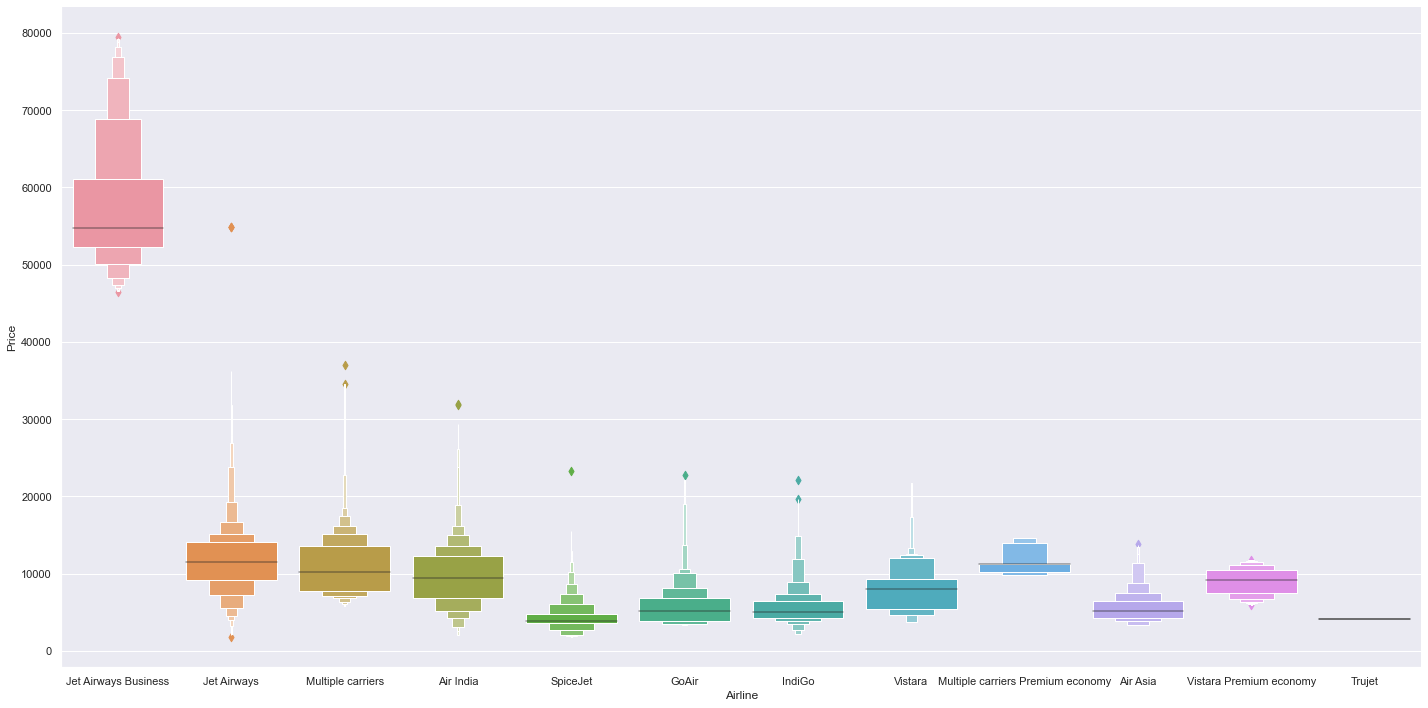

In [25]:
# Checking for the prices of diffent airlines
sort = train.sort_values('Price',ascending=False)
sns.catplot(x='Airline',y='Price',data=sort,kind='boxen',height=10,aspect=2);

In [26]:
# Dummies for train data 
# Creating dummy variables for Airline as it is a nominal category 

Airline = train[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

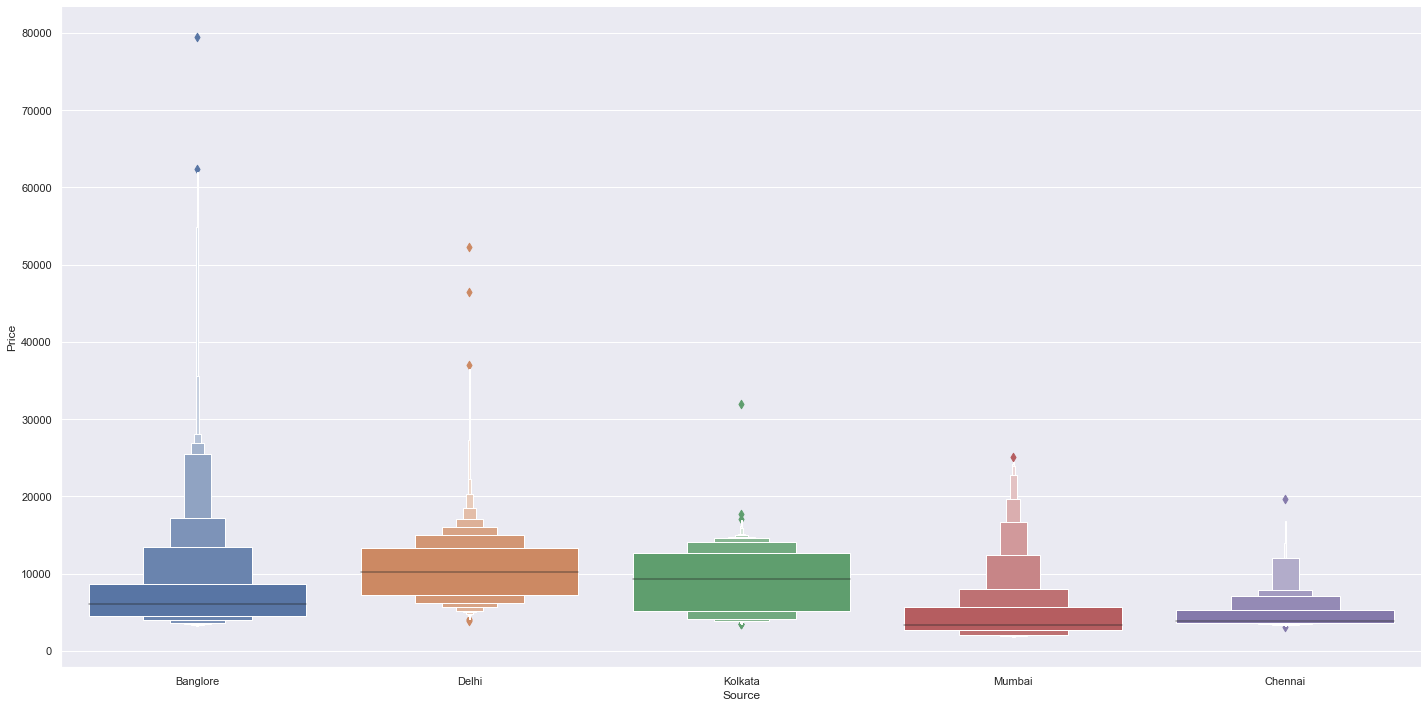

In [28]:
# Checking for the prices of diffent sources
sort = train.sort_values('Price',ascending=False)
sns.catplot(x='Source',y='Price',data=sort,kind='boxen',height=10,aspect=2);

In [29]:
# Creating dummy variables for Source as it is a nominal category 
Source = train[['Source']]

Source = pd.get_dummies(Source,drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


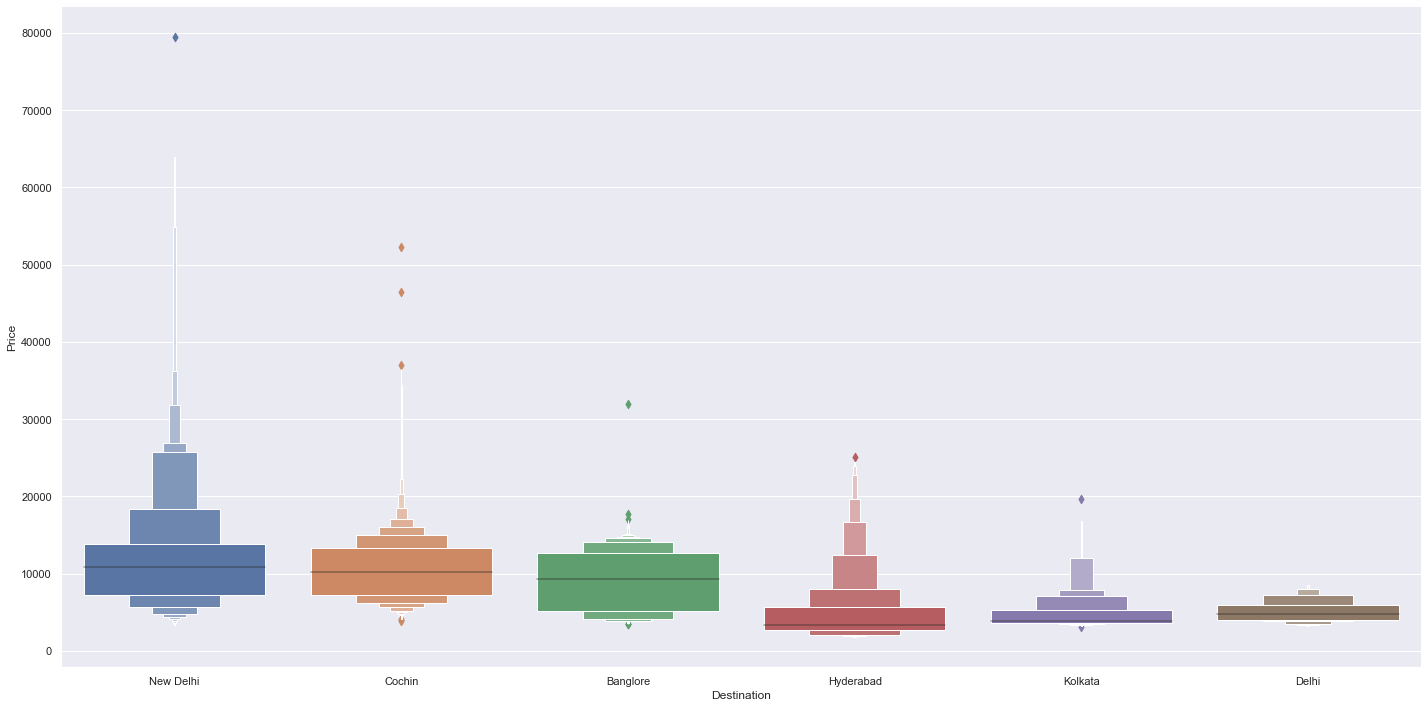

In [30]:
# Checking for the prices of diffent destinations
sort = train.sort_values('Price',ascending=False)
sns.catplot(x='Destination',y='Price',data=sort,kind='boxen',height=10,aspect=2);

In [31]:
# Creating dummy variables for destination as it is a nominal category 
Destination = train[['Destination']]

Destination = pd.get_dummies(Destination,drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
# Routs and Total stop columns are related to each othe and convaying the same info.
print(train['Route'])
print(train['Total_Stops'])

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object
0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object


In [33]:
print(train['Additional_Info'].value_counts())
# Most of the rows no info is provided so this column in not necessary for us

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64


In [34]:
# Dropping both routs and Additional_Info columns
train.drop(['Route','Additional_Info'],axis=1,inplace=True)
test.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [35]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [36]:
# As the totla stop is a ordinal data so we can assign labels to it according to the order
train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
test.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [37]:
train['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [38]:
data_train = pd.concat([train , Airline , Source, Destination],axis=1)

In [39]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [40]:
data_train

,Total_Stops,Price,Journey Day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [41]:
# Dummy variables for test data 

# Creating dummy variables for Airline as it is a nominal category 

Airline = test[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)

# Creating dummy variables for Source as it is a nominal category 
Source = test[['Source']]
Source = pd.get_dummies(Source,drop_first=True)

# Creating dummy variables for destination as it is a nominal category 
Destination = test[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)

data_test = pd.concat([test , Airline , Source, Destination],axis=1)

data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [42]:
data_test

,Total_Stops,Journey Day,Journey Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


Feature selection

In [43]:
# Splitting the data into X and y
X = data_train.drop('Price',axis=1)
y = data_train['Price']

In [44]:
#train.corr()

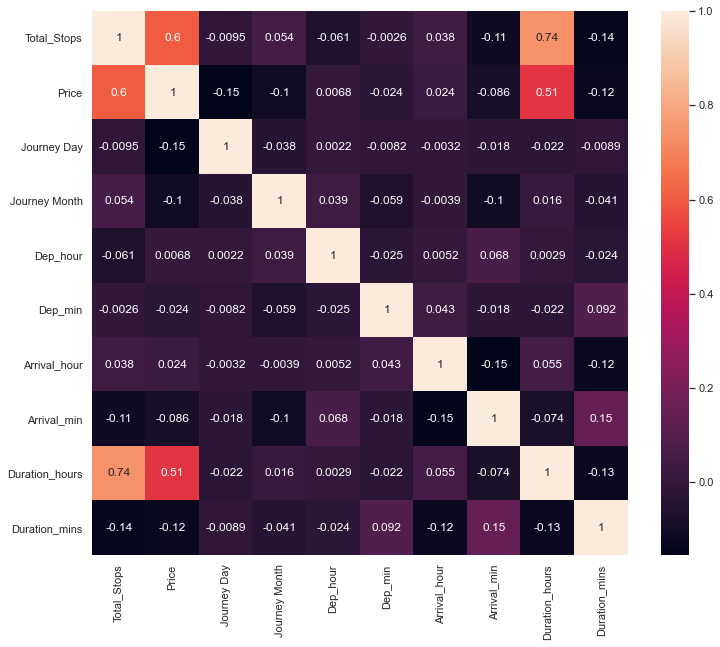

In [45]:
# Plotting the correlations
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(),annot=True);

In [46]:
# Using ExtraTreeRegressor to extract important features
etree = ExtraTreesRegressor()
etree.fit(X,y)

ExtraTreesRegressor()

In [47]:
print(etree.feature_importances_)

[2.34748712e-01 1.44202462e-01 5.24974928e-02 2.37926867e-02
 2.08189325e-02 2.93913797e-02 1.91681246e-02 1.15475401e-01
 1.75570686e-02 9.99786524e-03 1.95679130e-03 1.82805716e-02
 1.39508454e-01 6.71834629e-02 1.92692719e-02 8.05595956e-04
 3.44669114e-03 1.05509853e-04 5.17787819e-03 7.73623196e-05
 4.63479334e-04 1.21364667e-02 3.23389146e-03 6.94843547e-03
 1.02292801e-02 1.19072303e-02 5.89319778e-03 4.70700984e-04
 2.52556031e-02]


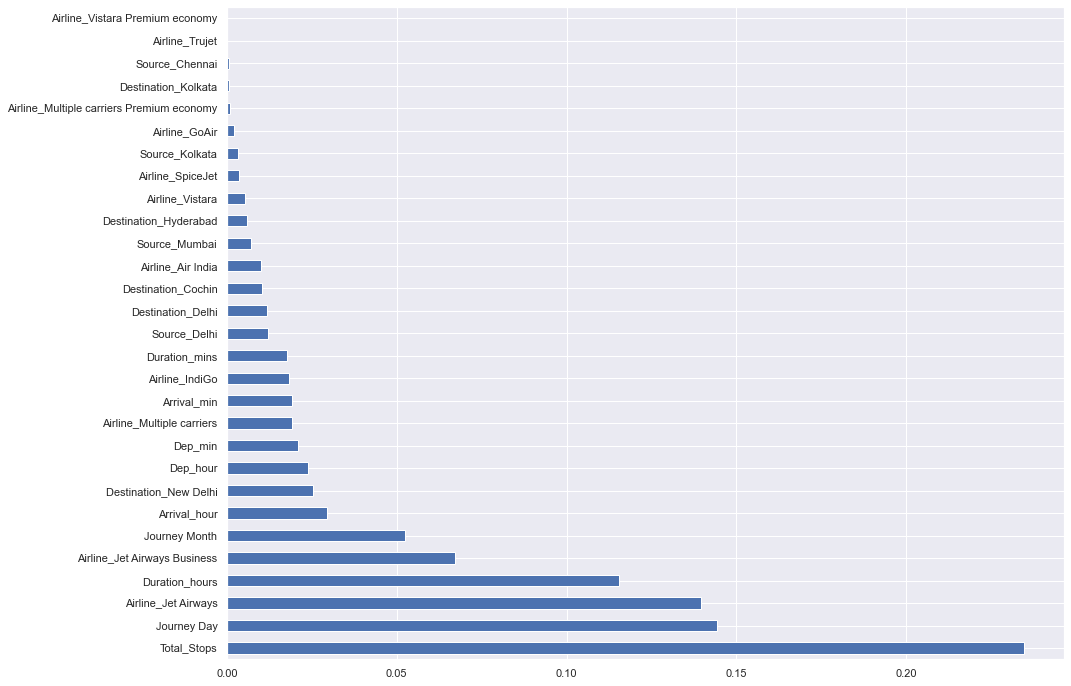

In [48]:
# Plotting the important featrues in assending order
plt.figure(figsize=(15,12))
imp = pd.Series(etree.feature_importances_,index=X.columns)
imp.nlargest(29).plot(kind='barh');

Model Creation

In [49]:
# Splitting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Using RandomForestRegressor 

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [51]:
y_pred = reg_rf.predict(X_test)

In [52]:
reg_rf.score(X_train,y_train)

0.9531346913031047

In [53]:
reg_rf.score(X_test,y_test)

0.7972569608462631

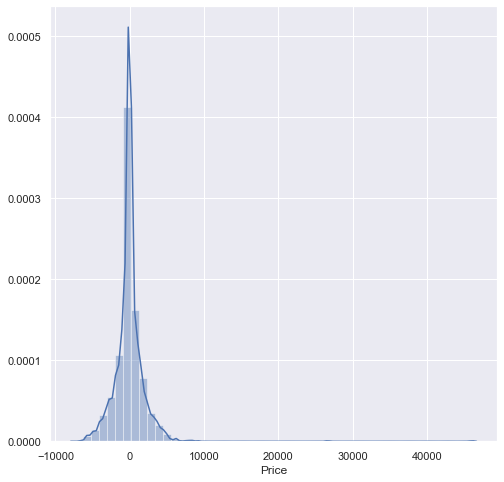

In [54]:
# Plot the predictions 
plt.figure(figsize=(8,8))
sns.distplot(y_test-y_pred);

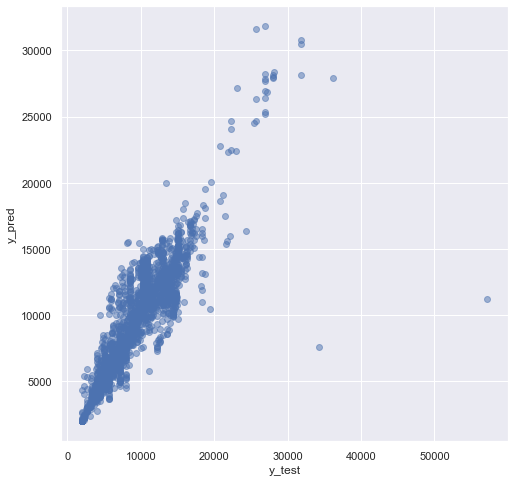

In [55]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred');

In [56]:
# Evaluate the model by generating the values of - mean squared error,root mean squared error,mean absolute error , r2_score
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score: ',r2_score(y_test,y_pred))

MAE:  1180.3239231196585
MSE:  4371556.829564614
RMSE:  2090.8268291670197
R2_score:  0.7972569608462631


Hyperparameter Tuning

In [57]:
# Using Randomized search cv

n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [58]:
# Create a random grid

ran_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [59]:
rf_random = RandomizedSearchCV(estimator=reg_rf,
                               param_distributions=ran_grid,
                              scoring='neg_mean_squared_error',
                              n_iter = 10,
                              cv=5,
                              verbose=2,
                              random_state=42,
                              n_jobs=1)

In [60]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [61]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [62]:
pred = rf_random.predict(X_test)

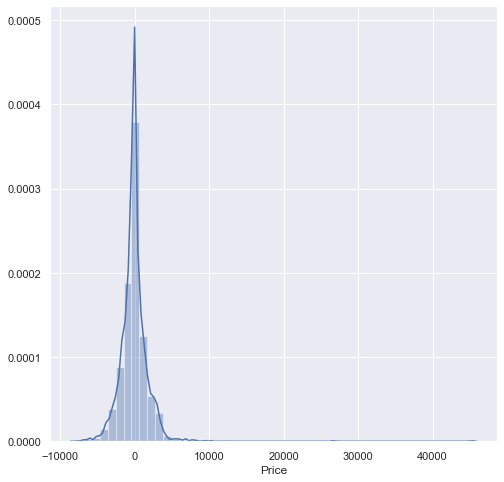

In [63]:
# Plot the predictions 
plt.figure(figsize=(8,8))
sns.distplot(y_test-pred);

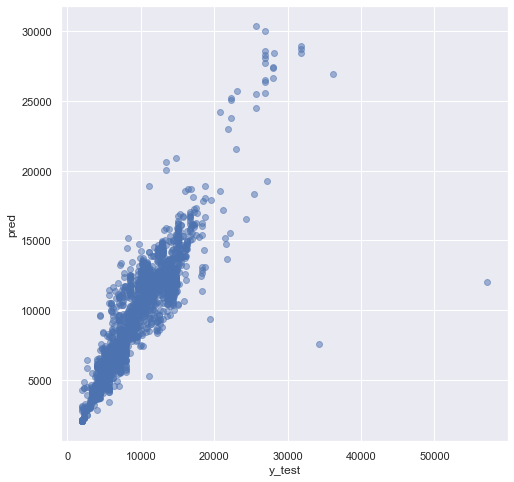

In [64]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('pred');

In [65]:
# Evaluate the model by generating the values of - mean squared error,root mean squared error,mean absolute error , r2_score
print('MAE: ',mean_absolute_error(y_test,pred))
print('MSE: ',mean_squared_error(y_test,pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score: ',r2_score(y_test,pred))

MAE:  1165.6095557790477
MSE:  4058889.562061043
RMSE:  2014.6685985692643
R2_score:  0.8117577701755294


Saving the model

In [66]:
# Save in flight_rf.pkl
file = open('flight_rf.pkl','wb')

# Dumb information to that file
pickle.dump(reg_rf,file)

In [67]:
# Loading the saved model 
#model = open('flight_rf.pkl','rb')
#forest = pickle.load(model)